Regresszió Feladat Nagy adatszettre: Bizonyos paraméterek alpján meghatározni a vételárat.

In [71]:
import pandas as pd

data = pd.read_csv("cars_cleaned.csv", encoding='ISO-8859-2')
data.head()


,Unnamed: 0,evjarat,allapot,kivitel,kilometerora_allasa,szallithato_szem_szama,klima_fajtaja,uzemanyag,hengerurtartalom,teljesitmeny,...,tempomat,vezetett_szervizkonyv,torzskonyv,tolatoradar,bluetooth_os_kihangosito,esoszenzor,futheto_elso_ules,brand,sebessegvalto_fokozatszam,age
0,1,2020,Kitűnő,Városi terepjáró (crossover),0.0,5,Manuális klíma,Benzin,1199.0,110,...,0,0,0,0,0,0,0,citroen,6,1
1,2,2020,Kitűnő,Egyterű,0.0,5,Automata klíma,Benzin,1199.0,131,...,1,0,0,1,1,1,0,citroen,6,1
2,3,2021,Kitűnő,Egyterű,2.0,5,Manuális klíma,Benzin,1199.0,110,...,1,0,0,1,0,1,0,citroen,6,0
3,4,2021,Kitűnő,Kombi,2.0,5,Digitális kétzónás klíma,Benzin,1199.0,131,...,1,0,0,1,0,1,0,citroen,6,0
4,5,2020,Normál,Városi terepjáró (crossover),15000.0,5,Digitális klíma,Benzin,1332.0,150,...,1,0,1,0,1,0,1,dacia,6,1


In [72]:
data = data.drop(data.columns[0], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92272 entries, 0 to 92271
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   evjarat                     92272 non-null  int64  
 1   allapot                     92272 non-null  object 
 2   kivitel                     92272 non-null  object 
 3   kilometerora_allasa         92272 non-null  float64
 4   szallithato_szem_szama      92272 non-null  int64  
 5   klima_fajtaja               92272 non-null  object 
 6   uzemanyag                   92272 non-null  object 
 7   hengerurtartalom            90582 non-null  float64
 8   teljesitmeny                92272 non-null  int64  
 9   sebessegvalto_fajtaja       92272 non-null  object 
 10  vetelar                     92272 non-null  int64  
 11  szin                        92272 non-null  object 
 12  elektromos_ablak_elol       92272 non-null  int64  
 13  centralzar                  922

In [73]:
data['allapot'] = data['allapot'].astype(str)
data['kivitel'] = data['kivitel'].astype(str)
data['klima_fajtaja'] = data['klima_fajtaja'].astype(str)
data['uzemanyag'] = data['uzemanyag'].astype(str)
data['sebessegvalto_fajtaja'] = data['sebessegvalto_fajtaja'].astype(str)
data['szin'] = data['szin'].astype(str)
data['brand'] = data['brand'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92272 entries, 0 to 92271
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   evjarat                     92272 non-null  int64  
 1   allapot                     92272 non-null  object 
 2   kivitel                     92272 non-null  object 
 3   kilometerora_allasa         92272 non-null  float64
 4   szallithato_szem_szama      92272 non-null  int64  
 5   klima_fajtaja               92272 non-null  object 
 6   uzemanyag                   92272 non-null  object 
 7   hengerurtartalom            90582 non-null  float64
 8   teljesitmeny                92272 non-null  int64  
 9   sebessegvalto_fajtaja       92272 non-null  object 
 10  vetelar                     92272 non-null  int64  
 11  szin                        92272 non-null  object 
 12  elektromos_ablak_elol       92272 non-null  int64  
 13  centralzar                  922

In [74]:
data.isnull().sum()

evjarat                          0
allapot                          0
kivitel                          0
kilometerora_allasa              0
szallithato_szem_szama           0
klima_fajtaja                    0
uzemanyag                        0
hengerurtartalom              1690
teljesitmeny                     0
sebessegvalto_fajtaja            0
vetelar                          0
szin                             0
elektromos_ablak_elol            0
centralzar                       0
abs_blokkolasgatlo               0
vezetooldali_legzsak             0
utasoldali_legzsak               0
szervokormany                    0
elektromos_tukor                 0
allithato_kormany                0
ulesmagassag_allitas             0
fedelzeti_komputer               0
oldallegzsak                     0
szinezett_uveg                   0
esp_menetstabilizator            0
kodlampa                         0
konnyufem_felni                  0
elektromos_ablak_hatul           0
futheto_tukor       

Fill 0 value to the NA value in hengerurtartalom, because the electric cars hasn't got hengerurtartalom

In [75]:
data['hengerurtartalom'] = data['hengerurtartalom'].fillna(0)
data.isnull().sum()

evjarat                       0
allapot                       0
kivitel                       0
kilometerora_allasa           0
szallithato_szem_szama        0
klima_fajtaja                 0
uzemanyag                     0
hengerurtartalom              0
teljesitmeny                  0
sebessegvalto_fajtaja         0
vetelar                       0
szin                          0
elektromos_ablak_elol         0
centralzar                    0
abs_blokkolasgatlo            0
vezetooldali_legzsak          0
utasoldali_legzsak            0
szervokormany                 0
elektromos_tukor              0
allithato_kormany             0
ulesmagassag_allitas          0
fedelzeti_komputer            0
oldallegzsak                  0
szinezett_uveg                0
esp_menetstabilizator         0
kodlampa                      0
konnyufem_felni               0
elektromos_ablak_hatul        0
futheto_tukor                 0
rendszeresen_karbantartott    0
cd_s_autoradio                0
isofix_r

In [76]:
data.shape

(92272, 47)

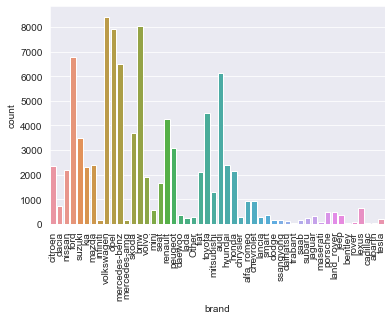

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='brand', data=data,capsize=0)
plt.xticks(rotation=90)
plt.show()

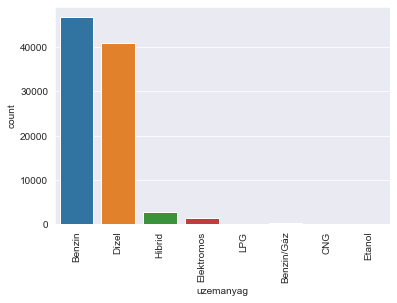

In [78]:
sns.countplot(x='uzemanyag', data=data,capsize=0)
plt.xticks(rotation=90)
plt.show()

In [79]:
data = pd.get_dummies(data,columns=['brand'])
data = pd.get_dummies(data, columns=['uzemanyag'])
data.head()

,evjarat,allapot,kivitel,kilometerora_allasa,szallithato_szem_szama,klima_fajtaja,hengerurtartalom,teljesitmeny,sebessegvalto_fajtaja,vetelar,...,brand_volkswagen,brand_volvo,uzemanyag_Benzin,uzemanyag_Benzin/Gáz,uzemanyag_CNG,uzemanyag_Dízel,uzemanyag_Elektromos,uzemanyag_Etanol,uzemanyag_Hibrid,uzemanyag_LPG
0,2020,Kitűnő,Városi terepjáró (crossover),0.0,5,Manuális klíma,1199.0,110,manuáis,5480000,...,0,0,1,0,0,0,0,0,0,0
1,2020,Kitűnő,Egyterű,0.0,5,Automata klíma,1199.0,131,manuáis,7190000,...,0,0,1,0,0,0,0,0,0,0
2,2021,Kitűnő,Egyterű,2.0,5,Manuális klíma,1199.0,110,manuáis,7520000,...,0,0,1,0,0,0,0,0,0,0
3,2021,Kitűnő,Kombi,2.0,5,Digitális kétzónás klíma,1199.0,131,manuáis,8150000,...,0,0,1,0,0,0,0,0,0,0
4,2020,Normál,Városi terepjáró (crossover),15000.0,5,Digitális klíma,1332.0,150,manuáis,5995000,...,0,0,1,0,0,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
condition_mapping = {
 'Normál': 1,
 'Megkímélt': 2,
 'Sérülésmentes': 3,
 'Újszerű': 4,
 'Kitűnő': 5
}
data['allapot_encoding'] = data['allapot'].map(lambda x: condition_mapping[x])
data = data.drop(columns=['kivitel', 'allapot','klima_fajtaja','sebessegvalto_fajtaja','szin','hengerurtartalom'])
X = data.drop('vetelar', axis=1).values
y = data['vetelar'].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42,shuffle=True)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

score = lin_reg.score(x_test,y_test)

print("Score: {}".score)

y_pred = lin_reg.predict(x_test[:5,:])

print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))



0.7671041674475925


AttributeError: 'numpy.ndarray' object has no attribute 'sample'